In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv(r"D:\utkarsh\project\Datascience\anaconda_projects\Sample - Superstore.csv" , encoding='latin1' )

# Check first few rows
print(df.head())
print(df.info())


   Row ID        Order ID  Order Date   Ship Date       Ship Mode Customer ID  \
0       1  CA-2016-152156   11/8/2016  11/11/2016    Second Class    CG-12520   
1       2  CA-2016-152156   11/8/2016  11/11/2016    Second Class    CG-12520   
2       3  CA-2016-138688   6/12/2016   6/16/2016    Second Class    DV-13045   
3       4  US-2015-108966  10/11/2015  10/18/2015  Standard Class    SO-20335   
4       5  US-2015-108966  10/11/2015  10/18/2015  Standard Class    SO-20335   

     Customer Name    Segment        Country             City  ...  \
0      Claire Gute   Consumer  United States        Henderson  ...   
1      Claire Gute   Consumer  United States        Henderson  ...   
2  Darrin Van Huff  Corporate  United States      Los Angeles  ...   
3   Sean O'Donnell   Consumer  United States  Fort Lauderdale  ...   
4   Sean O'Donnell   Consumer  United States  Fort Lauderdale  ...   

  Postal Code  Region       Product ID         Category Sub-Category  \
0       42420   Sout

In [2]:
# Convert to datetime format
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Ship Date'] = pd.to_datetime(df['Ship Date'])


In [3]:
# Extract useful date parts
df['Order Month'] = df['Order Date'].dt.month
df['Order Year'] = df['Order Date'].dt.year
df['Order DayName'] = df['Order Date'].dt.day_name()


In [4]:
df['Sales']

0       261.9600
1       731.9400
2        14.6200
3       957.5775
4        22.3680
          ...   
9989     25.2480
9990     91.9600
9991    258.5760
9992     29.6000
9993    243.1600
Name: Sales, Length: 9994, dtype: float64

In [5]:
print(df.isnull().sum())


Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
Order Month      0
Order Year       0
Order DayName    0
dtype: int64


C:\Users\dell\AppData\Local\Temp\ipykernel_13488\3069973087.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category_sales.index, y=category_sales.values, palette="viridis")


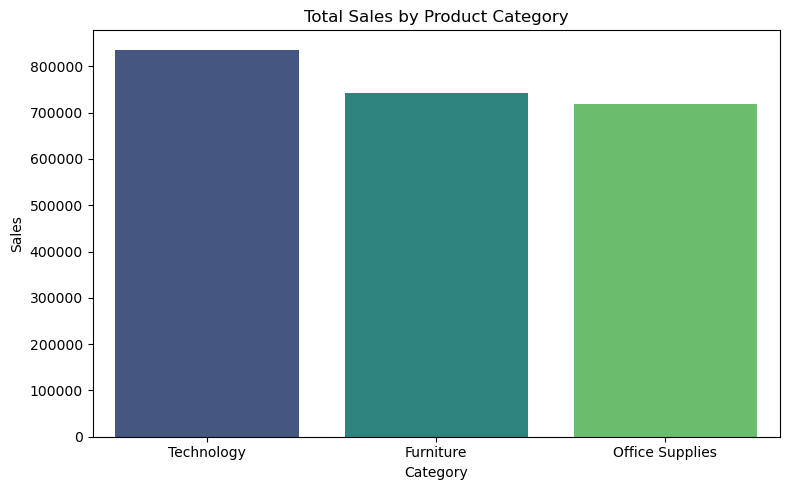

In [6]:
# Group by Category and sum the sales
category_sales = df.groupby('Category')['Sales'].sum().sort_values(ascending=False)

# Plot vertical bar chart
plt.figure(figsize=(8, 5))
sns.barplot(x=category_sales.index, y=category_sales.values, palette="viridis")
plt.title("Total Sales by Product Category")
plt.xlabel("Category")
plt.ylabel("Sales")
plt.tight_layout()
plt.show()


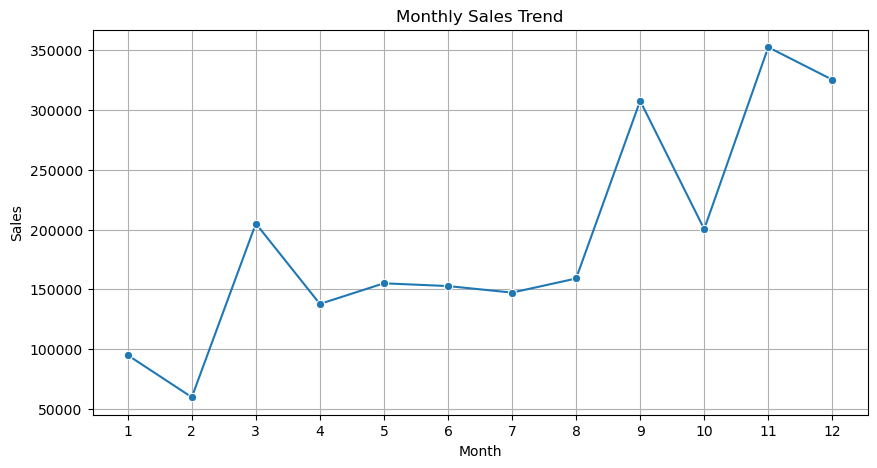

In [7]:
# Group sales by month
monthly_sales = df.groupby('Order Month')['Sales'].sum()

# Plot
plt.figure(figsize=(10, 5))
sns.lineplot(x=monthly_sales.index, y=monthly_sales.values, marker='o')
plt.title("Monthly Sales Trend")
plt.xlabel("Month")
plt.ylabel("Sales")
plt.xticks(range(1, 13))
plt.grid(True)
plt.show()


C:\Users\dell\AppData\Local\Temp\ipykernel_13488\1802945658.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=subcat_sales.index, y=subcat_sales.values, palette="magma")


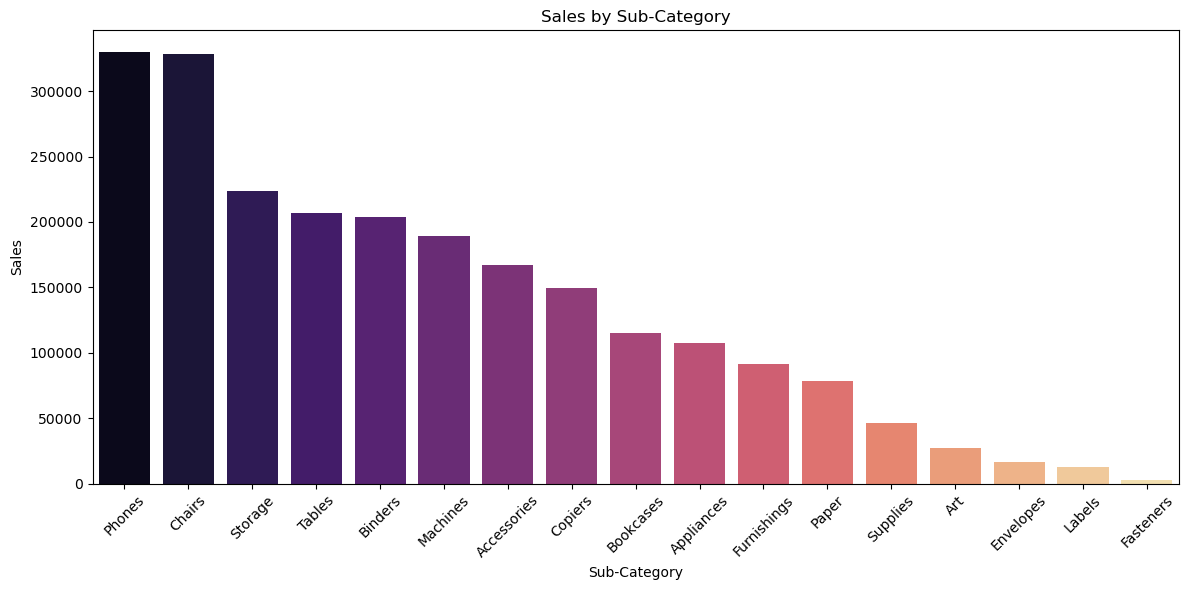

In [8]:
# Group by Sub-Category
subcat_sales = df.groupby('Sub-Category')['Sales'].sum().sort_values(ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x=subcat_sales.index, y=subcat_sales.values, palette="magma")
plt.title("Sales by Sub-Category")
plt.xlabel("Sub-Category")
plt.ylabel("Sales")
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()


C:\Users\dell\AppData\Local\Temp\ipykernel_13488\857702637.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=region_sales.index, y=region_sales.values, palette="cubehelix")


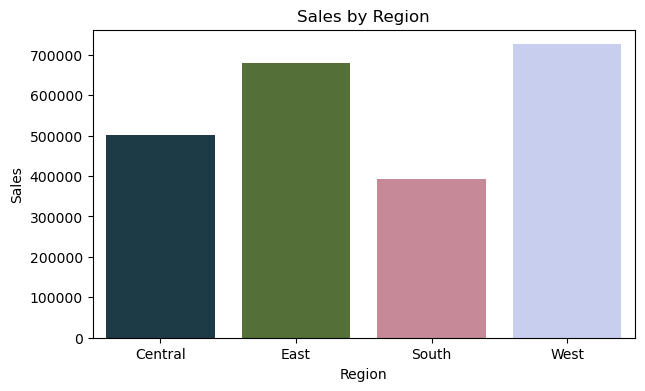

In [9]:
# Region-wise sales
region_sales = df.groupby('Region')['Sales'].sum()

plt.figure(figsize=(7, 4))
sns.barplot(x=region_sales.index, y=region_sales.values, palette="cubehelix")
plt.title("Sales by Region")
plt.xlabel("Region")
plt.ylabel("Sales")
plt.show()


C:\Users\dell\AppData\Local\Temp\ipykernel_13488\1222271436.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=yearly_sales.index, y=yearly_sales.values, palette="Set2")


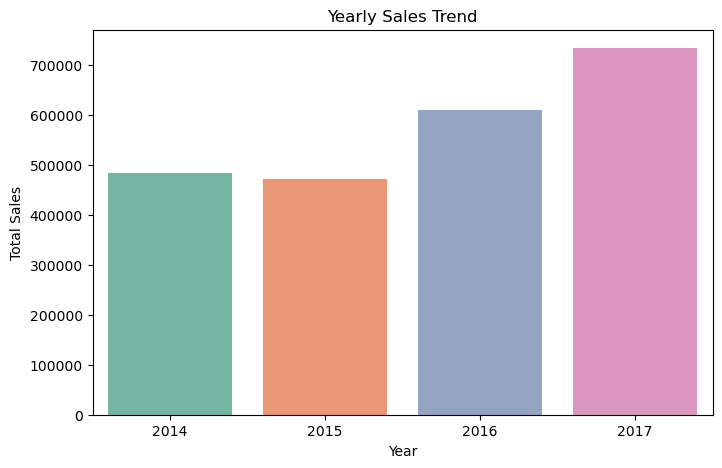

In [10]:
# Group by year
yearly_sales = df.groupby('Order Year')['Sales'].sum()

# Plot
plt.figure(figsize=(8, 5))
sns.barplot(x=yearly_sales.index, y=yearly_sales.values, palette="Set2")
plt.title("Yearly Sales Trend")
plt.xlabel("Year")
plt.ylabel("Total Sales")
plt.show()


C:\Users\dell\AppData\Local\Temp\ipykernel_13488\1391447843.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=weekday_sales.index, y=weekday_sales.values, palette="coolwarm")


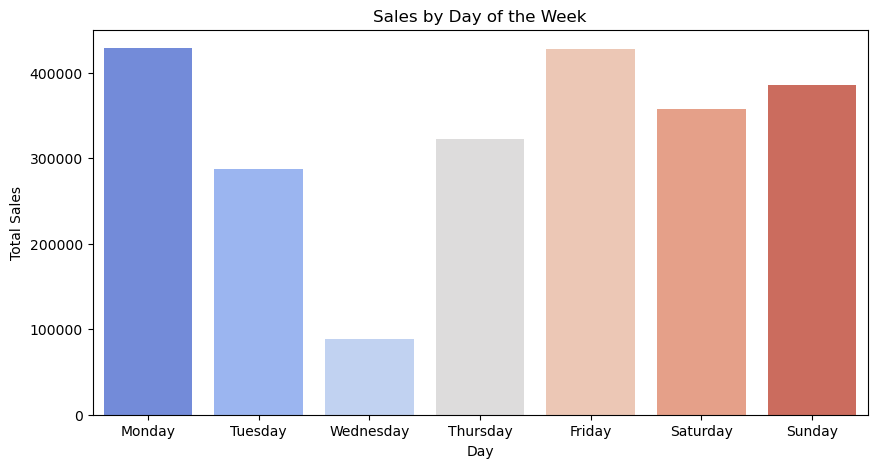

In [11]:
# Group by day name
weekday_sales = df.groupby('Order DayName')['Sales'].sum()

# Optional: Order the weekdays correctly
weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
weekday_sales = weekday_sales.reindex(weekday_order)

# Plot
plt.figure(figsize=(10, 5))
sns.barplot(x=weekday_sales.index, y=weekday_sales.values, palette="coolwarm")
plt.title("Sales by Day of the Week")
plt.xlabel("Day")
plt.ylabel("Total Sales")
plt.show()


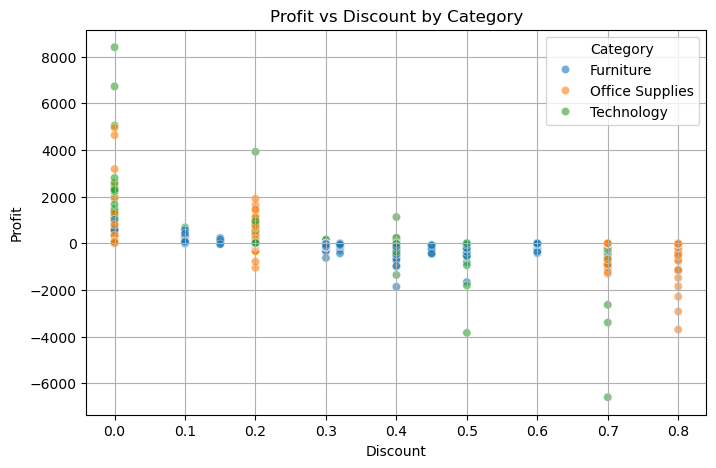

In [12]:
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x='Discount', y='Profit', hue='Category', alpha=0.6)
plt.title("Profit vs Discount by Category")
plt.xlabel("Discount")
plt.ylabel("Profit")
plt.grid(True)
plt.show()
